## Data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("data/hk-centaline-property-buy-clean.csv")

print(type(df))
print(df.shape)
df.head()

<class 'pandas.core.frame.DataFrame'>
(10000, 11)


,name,room_numbers,address,price,usable_area,gross_floor_area,url,latitude,longitude,price_per_sq_foot_SA,price_per_sq_foot_GFA
0,KING LAM ESTATE・KING LUI HOUSE (BLOCK 2),Low Floor・FLAT 21・1 Room,Po Lam,1400000.0,349.0,NaN,https://hk.centanet.com/findproperty/en/detail...,22.323713,114.254880,4011.461318,NaN
1,TAK TIN ESTATE・TAK YEE HOUSE (BLOCK 3),(1 Suite),Lam Tin,1800000.0,443.0,NaN,https://hk.centanet.com/findproperty/en/detail...,22.308020,114.237564,4063.205418,NaN
2,FU SHIN ESTATE・SHIN KWAN HOUSE (BLOCK 1),1 Room,Tai Po Town Centre,1200000.0,294.0,NaN,https://hk.centanet.com/findproperty/en/detail...,22.442322,114.165506,4081.632653,NaN
3,Long Ping Estate・HOR PING HOUSE,Low Floor・FLAT 35・2 Rooms,Long Ping,1480000.0,355.0,NaN,https://hk.centanet.com/findproperty/en/detail...,NaN,NaN,4169.014085,NaN
4,TAI WO ESTATE・OI WO HOUSE (BLOCK 2),Studio,Tai Po Town Centre,1480000.0,349.0,NaN,https://hk.centanet.com/findproperty/en/detail...,22.442322,114.165506,4240.687679,NaN


### Scatter plot on a map

In [3]:
! pip install nbformat

In [4]:
# Use plotly express to create figure 
fig = px.scatter_mapbox(
    df, 
    lat = "latitude",
    lon = "longitude",
    center = {"lat": 22.3193, "lon": 114.1694}, # Centered in Hong Kong 
    width = 600,
    height = 600,
    hover_data = ["price_per_sq_foot_SA"] # Display price when hovering mouse over house
)

# Add mapbox_style to figure layout
fig.update_layout(mapbox_style="open-street-map")

# # Show figure
# fig.show()

# Save the figure as an HTML file
fig.write_html("map_figure.html")


In [5]:
# Get value counts of "address" column and use the value_counts method to determine the 10 most prevalent address in our dataset.
counts = df["address"].value_counts()
print(counts.head(10))

len(counts)

address
Mid-Levels West        420
Tseung Kwan O          397
Lohas Park             351
Tsuen Wan West         281
Tai Wai                275
Pak Shek Kok           261
Wu Kai Sha             256
Kai Tak New Area       243
Yuen Long Station      234
Yuen Long Southeast    227
Name: count, dtype: int64


161

In [6]:
# Describe area and price per area 
df[["usable_area","price_per_sq_foot_SA"]].describe()

,usable_area,price_per_sq_foot_SA
count,10000.000000,10000.000000
mean,667.412300,16457.146977
std,419.788599,6954.073687
min,125.000000,4011.461318
25%,428.000000,11862.224254
50%,538.000000,14926.899246
75%,769.000000,19097.452476
max,6890.000000,98564.388258


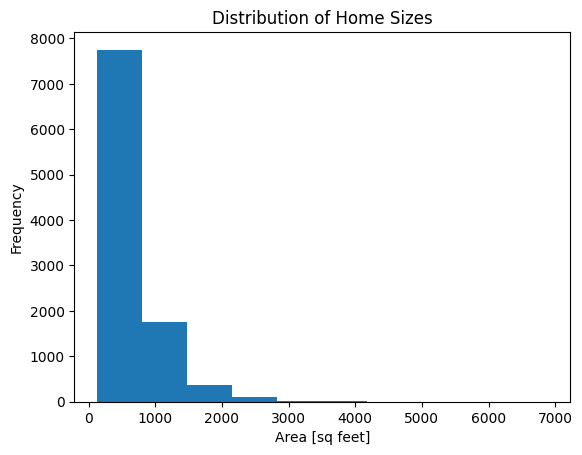

In [7]:
# Use Matplotlib to create histogram of "usable_area"
plt.hist(df["usable_area"])
plt.xlabel("Area [sq feet]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Sizes");

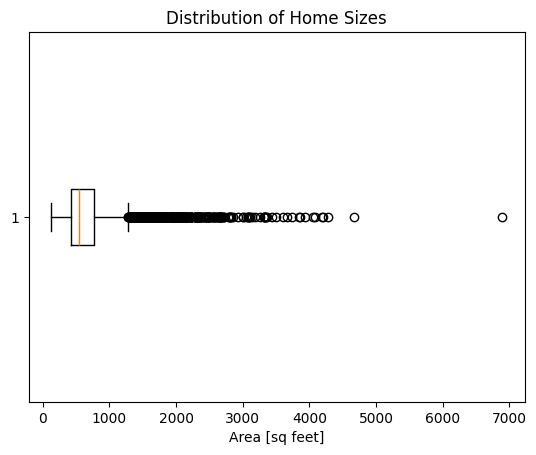

In [8]:
# Use Matplotlib to create boxplot of "usable_area"
plt.boxplot(df["usable_area"], vert=False)
plt.xlabel("Area [sq feet]")
plt.title("Distribution of Home Sizes");

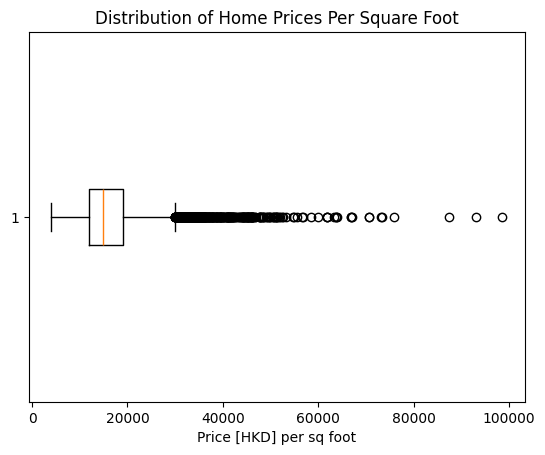

In [9]:
# Use Matplotlib to create boxplot of price per area 
plt.boxplot(df["price_per_sq_foot_SA"], vert=False)
plt.xlabel("Price [HKD] per sq foot")
plt.title("Distribution of Home Prices Per Square Foot");